In [2]:
# Import pandas
import pandas as pd
import time
# Load dataset
cc_apps = pd.read_csv("cc_approvals.data",header=None)

# Inspect data
print(cc_apps.head())
print(cc_apps.shape)

  0      1      2  3  4  5  6     7  8  9   10 11 12     13   14 15
0  b  30.83  0.000  u  g  w  v  1.25  t  t   1  f  g  00202    0  +
1  a  58.67  4.460  u  g  q  h  3.04  t  t   6  f  g  00043  560  +
2  a  24.50  0.500  u  g  q  h  1.50  t  f   0  f  g  00280  824  +
3  b  27.83  1.540  u  g  w  v  3.75  t  t   5  t  g  00100    3  +
4  b  20.17  5.625  u  g  w  v  1.71  t  f   0  f  s  00120    0  +
(690, 16)


In [3]:
# Print summary statistics
cc_apps_description = cc_apps.describe()
print(cc_apps_description)

print("\n")

# Print DataFrame information
cc_apps_info = cc_apps.info()
print(cc_apps_info)

print("\n")

# Inspect missing values in the dataset
print(cc_apps.tail(17))

               2           7          10             14
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406    2.40000    1017.385507
std      4.978163    3.346513    4.86294    5210.102598
min      0.000000    0.000000    0.00000       0.000000
25%      1.000000    0.165000    0.00000       0.000000
50%      2.750000    1.000000    0.00000       5.000000
75%      7.207500    2.625000    3.00000     395.500000
max     28.000000   28.500000   67.00000  100000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 no

In [4]:
# Import numpy
import numpy as np

# Inspect missing values in the dataset
print(cc_apps.tail(17))

# Replace the '?'s with NaN
cc_apps = cc_apps.replace("?",np.nan)

# Inspect the missing values again
print(cc_apps.tail(17))

    0      1       2  3  4   5   6      7  8  9   10 11 12     13   14 15
673  ?  29.50   2.000  y  p   e   h  2.000  f  f   0  f  g  00256   17  -
674  a  37.33   2.500  u  g   i   h  0.210  f  f   0  f  g  00260  246  -
675  a  41.58   1.040  u  g  aa   v  0.665  f  f   0  f  g  00240  237  -
676  a  30.58  10.665  u  g   q   h  0.085  f  t  12  t  g  00129    3  -
677  b  19.42   7.250  u  g   m   v  0.040  f  t   1  f  g  00100    1  -
678  a  17.92  10.210  u  g  ff  ff  0.000  f  f   0  f  g  00000   50  -
679  a  20.08   1.250  u  g   c   v  0.000  f  f   0  f  g  00000    0  -
680  b  19.50   0.290  u  g   k   v  0.290  f  f   0  f  g  00280  364  -
681  b  27.83   1.000  y  p   d   h  3.000  f  f   0  f  g  00176  537  -
682  b  17.08   3.290  u  g   i   v  0.335  f  f   0  t  g  00140    2  -
683  b  36.42   0.750  y  p   d   v  0.585  f  f   0  f  g  00240    3  -
684  b  40.58   3.290  u  g   m   v  3.500  f  f   0  t  s  00400    0  -
685  b  21.08  10.085  y  p   e   h  1

In [5]:
# Impute the missing values with mean imputation
cc_apps.fillna(cc_apps.mean(), inplace=True)

# Count the number of NaNs in the dataset to verify
print(cc_apps.isnull())

        0      1      2      3      4      5      6      7      8      9   \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
685  False  False  False  False  False  False  False  False  False  False   
686  False  False  False  False  False  False  False  False  False  False   
687  False  False  False  False  False  False  False  False  False  False   
688  False  False  False  False  False  False  False  False  False  False   
689  False  False  False  False  False  False  False  False  False  False   

        10     11     12     13     14     15  
0    False  False  False  F

In [6]:
# Iterate over each column of cc_apps
for col in cc_apps:
    # Check if the column is of object type
    if cc_apps[col].dtypes == 'object':
        # Impute with the most frequent value
        cc_apps = cc_apps.fillna(cc_apps[col].value_counts().index[0])

# Count the number of NaNs in the dataset and print the counts to verify
print(cc_apps.isnull())

        0      1      2      3      4      5      6      7      8      9   \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
685  False  False  False  False  False  False  False  False  False  False   
686  False  False  False  False  False  False  False  False  False  False   
687  False  False  False  False  False  False  False  False  False  False   
688  False  False  False  False  False  False  False  False  False  False   
689  False  False  False  False  False  False  False  False  False  False   

        10     11     12     13     14     15  
0    False  False  False  F

In [7]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le=LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in cc_apps:
    # Compare if the dtype is object
    if cc_apps[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        le.fit(cc_apps[col])
        cc_apps[col]=le.transform(cc_apps[col])
    

In [8]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Drop the features 11 and 13 and convert the DataFrame to a NumPy array
cc_apps = cc_apps.drop([11,13],axis=1)
cc_apps = cc_apps.values

# Segregate features and labels into separate variables
X,y = cc_apps[:,0:13] , cc_apps[:,13]
print(X)
print(y)
# Split into train and test sets
X_train, X_test, y_train,y_test = train_test_split(X,
                                y,
                                test_size=0.33,
                                random_state=14)

[[1.000e+00 1.560e+02 0.000e+00 ... 1.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 3.280e+02 4.460e+00 ... 6.000e+00 0.000e+00 5.600e+02]
 [0.000e+00 8.900e+01 5.000e-01 ... 0.000e+00 0.000e+00 8.240e+02]
 ...
 [0.000e+00 9.700e+01 1.350e+01 ... 1.000e+00 0.000e+00 1.000e+00]
 [1.000e+00 2.000e+01 2.050e-01 ... 0.000e+00 0.000e+00 7.500e+02]
 [1.000e+00 1.970e+02 3.375e+00 ... 0.000e+00 0.000e+00 0.000e+00]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0

In [9]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rX_train = scaler.fit_transform(X_train)
rX_test = scaler.fit_transform(X_test)

Accuracy of logistic regression classifier:  83.33333333333334
Confusion Matrix 
[[ 87   8]
 [ 30 103]]
Best Accuracy of Logistic Regression after HyperParameter Tuning using GridSearchCV: 85.362319 using {'C': 1.0, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.1}


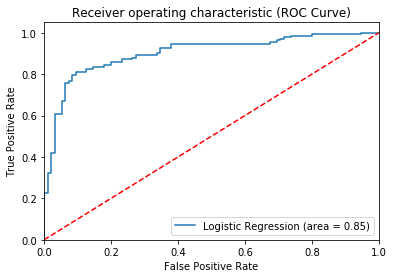

11.926189422607422


In [10]:
def LogReg():
    start=time.time()
# Import LogisticRegression
    from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
    logreg =LogisticRegression(random_state=24)

# Fit logreg to the train set
    logreg.fit(rX_train,y_train)
    # Import confusion_matrix
    from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
    y_pred = logreg.predict(rX_test)

# Get the accuracy score of logreg model and print it
    print("Accuracy of logistic regression classifier: ", logreg.score(rX_test,y_test)*100)

# Print the confusion matrix of the logreg model
    print("Confusion Matrix ")
    print(confusion_matrix(y_test,y_pred))
    # Import GridSearchCV
    from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
    tol = [0.1,0.01,0.001]
    max_iter =[200,500,1000]
    solvers = ['newton-cg', 'lbfgs', 'liblinear']
    penalty = ['l2']
    c_values = [100, 10, 1.0, 0.1, 0.01]
# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
    param_grid = dict({'tol':tol,'max_iter':max_iter,'solver':solvers,'penalty':penalty,'C':c_values})
    # Instantiate GridSearchCV with the required parameters
    grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX
    rescaledX = scaler.fit_transform(X)

# Fit data to grid_model
    grid_model_result = grid_model.fit(rescaledX,y)

# Summarize results
    best_score, best_params = grid_model_result.best_score_,grid_model_result.best_params_
    print("Best Accuracy of Logistic Regression after HyperParameter Tuning using GridSearchCV: %f using %s" % ((best_score*100),best_params))
    
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(y_test, logreg.predict(rX_test))
    fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(rX_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC Curve)')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    end=time.time()
    return end-start
L=LogReg()
print(L)

Accuracy Score of Random Forest Classifier is: 85.08771929824562
Confusion Matrix
[[ 82  13]
 [ 21 112]]
Calculating Best Accuracy....Please wait..!!
Best Accuracy of Random Forest after HyperParameter Tuning is: 88.321646 using {'max_depth': 80, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}


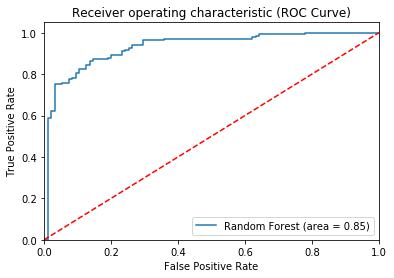

208.13123750686646


In [11]:
def RandomForest():
    start=time.time()
    from sklearn.ensemble import RandomForestClassifier
    model=RandomForestClassifier(random_state=24,
                                  n_estimators = 2014,
                                  max_depth = 14, 
                                  min_samples_split = 10,  min_samples_leaf = 1) 
    model.fit(rX_train,y_train)
#prediction
    y_pred = model.predict(rX_test)
#Accuracy
#from sklearn.metrics import accuracy_score
    print('Accuracy Score of Random Forest Classifier is:', model.score(rX_test,y_test)*100)
    from sklearn.metrics import confusion_matrix
    print("Confusion Matrix")
    print(confusion_matrix(y_test,y_pred))
    # Import GridSearchCV
    from sklearn.model_selection import GridSearchCV

    param_grid ={
    #'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    #'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
    }
# Instantiate GridSearchCV with the required parameters
    grid_model = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1,verbose=0)
    print("Calculating Best Accuracy....Please wait..!!")
# Use scaler to rescale X and assign it to rescaledX
    rescaledX = scaler.fit_transform(X_train)

# Fit data to grid_model
    grid_model_result = grid_model.fit(rescaledX,y_train)

# Summarize results
    best_score, best_params = grid_model_result.best_score_,grid_model_result.best_params_
    print("Best Accuracy of Random Forest after HyperParameter Tuning is: %f using %s" % ((best_score*100),best_params))
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(y_test, model.predict(rX_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(rX_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC Curve)')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    end=time.time()
    return end-start
R=RandomForest()
print(R)

Accuracy Score of Decision tree Algorithm is:  82.01754385964912
Confusion Matrix
[[ 80  15]
 [ 26 107]]
Best Accuracy of Decision Tree after HyperParameter Tuning is : 85.942029 using {'max_depth': 2, 'min_samples_split': 10}


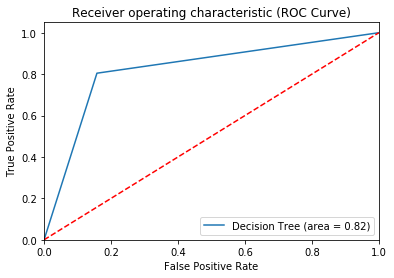

2.317028522491455


In [12]:
def DecisionTree():
    start=time.time()
    from sklearn.tree import DecisionTreeClassifier
    classifier = DecisionTreeClassifier(random_state=24)
    classifier = classifier.fit(rX_train,y_train)
    #prediction
    y_pred = classifier.predict(rX_test)
#Accuracy
    from sklearn.metrics import accuracy_score
    print('Accuracy Score of Decision tree Algorithm is: ', accuracy_score(y_test,y_pred)*100)
    from sklearn.metrics import confusion_matrix
    print("Confusion Matrix")
    print(confusion_matrix(y_test,y_pred))
    # Import GridSearchCV
    from sklearn.model_selection import GridSearchCV

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
    param_grid ={'min_samples_split' : range(10,500,20),'max_depth': [1,2,3,4]}
    # Instantiate GridSearchCV with the required parameters
    grid_model = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX
    rescaledX = scaler.fit_transform(X)


# Fit data to grid_model
    grid_model_result = grid_model.fit(rescaledX,y)

# Summarize results
    best_score, best_params = grid_model_result.best_score_,grid_model_result.best_params_
    print("Best Accuracy of Decision Tree after HyperParameter Tuning is : %f using %s" % ((best_score*100),best_params))
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(y_test, classifier.predict(rX_test))
    fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(rX_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC Curve)')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    end=time.time()
    return end-start
D=DecisionTree()
print(D)

In [11]:
def DL():
    start=time.time()
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.utils.vis_utils import plot_model
    model = Sequential()
    def create_model(optimizer='adam', init='glorot_uniform'):
        model = Sequential()
        model.add(Dense(12, input_dim=13, activation='relu'))
        model.add(Dense(8, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
        model.fit(rX_train,y_train, epochs=60, batch_size=100,verbose=0)
        #_, accuracy = model.evaluate(rX_train,y_train)
        #print('Accuracy of Sequential Neural Network is: %.2f' % (accuracy*100))
        return model
    model.add(Dense(12, input_dim=13, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
    model.fit(rX_train,y_train, epochs=60, batch_size=100,verbose=0)
    _, accuracy = model.evaluate(rX_train,y_train)
    print('Accuracy of Sequential Neural Network is: %.2f' % (accuracy*100))
    create_model()
    import numpy
    seed = 7
    numpy.random.seed(seed)
    batch_size = 500
    epochs = 10
    from sklearn.model_selection import GridSearchCV
    from keras.wrappers.scikit_learn import KerasClassifier
    m=KerasClassifier(build_fn=create_model,epochs=epochs, 
                           batch_size=batch_size, verbose=0)
    param_grid = dict(optimizer=('rmsprop','adam'))
    grid_model =GridSearchCV(m, param_grid=param_grid,return_train_score=True,
                   scoring=['precision_macro','recall_macro','f1_macro'],
                    refit='precision_macro',cv=5)
    print("Calculating Best Accuracy....Please wait..!!")


# Fit data to grid_model
    grid_model_result = grid_model.fit(rX_train,y_train)

# Summarize results
    best_score, best_params = grid_model_result.best_score_,grid_model_result.best_params_
    print("Best Accuracy of Sequential Neural Network after HyperParameter Tuning is: %f using %s" % ((best_score*100),best_params))
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
    end=time.time()
    return end-start
DL=DL()
print(DL)

462/462 [==============================] - 0s 449us/step
Accuracy of Sequential Neural Network is: 88.10
Calculating Best Accuracy....Please wait..!!
Best Accuracy of Sequential Neural Network after HyperParameter Tuning is: 88.592735 using {'optimizer': 'adam'}
69.3438401222229


Accuracy Score of Support Vector Classifier is :  84.21052631578947
[[ 87   8]
 [ 28 105]]
Best accuracy of Support Vector Classifier is : 85.507246 using {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


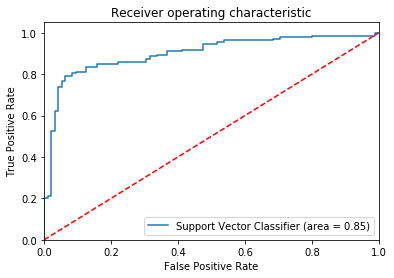

25.001392364501953


In [14]:
def SVM():
    start=time.time()
    from sklearn.svm import SVC
    classifier = SVC(kernel='rbf', random_state = 24, probability=True)
    classifier.fit(rX_train,y_train)
    #prediction
    y_pred = classifier.predict(rX_test)
    from sklearn.metrics import accuracy_score
    print('Accuracy Score of Support Vector Classifier is : ', accuracy_score(y_test,y_pred)*100)
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(y_test,y_pred))
    # Import GridSearchCV
    from sklearn.model_selection import GridSearchCV

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
    param_grid = {'C': [1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['poly','rbf', 'sigmoid']}
    # Instantiate GridSearchCV with the required parameters
    grid_model = GridSearchCV(estimator=classifier, param_grid=param_grid, refit=True, cv=5)

# Use scaler to rescale X and assign it to rescaledX
    rescaledX = scaler.fit_transform(X)


# Fit data to grid_model
    grid_model_result = grid_model.fit(rescaledX,y)

# Summarize results
    best_score, best_params = grid_model_result.best_score_,grid_model_result.best_params_
    print("Best accuracy of Support Vector Classifier is : %f using %s" % ((best_score*100),best_params))
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(y_test, classifier.predict(rX_test))
    fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(rX_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Support Vector Classifier (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    end=time.time()
    return end-start
S=SVM()
print(S)

Accuracy Score of Gradient Boost is : 84.21052631578947
[[ 85  10]
 [ 26 107]]
Best Accuracy of Gradient Boost is : 85.507246 using {'max_depth': 2, 'min_samples_split': 290}


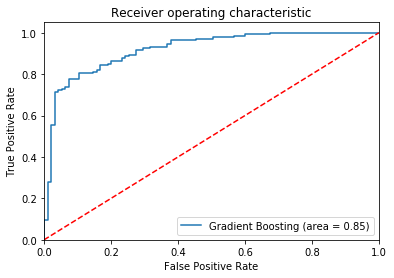

94.43940758705139


In [15]:
def GradientBoost():
    start=time.time()
    from sklearn.ensemble import GradientBoostingClassifier
    classifier = GradientBoostingClassifier(random_state=24)
    classifier = classifier.fit(rX_train,y_train)
#prediction
    y_pred = classifier.predict(rX_test)
#Accuracy
    from sklearn.metrics import accuracy_score
    print('Accuracy Score of Gradient Boost is :', accuracy_score(y_test,y_pred)*100)
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(y_test,y_pred))
    # Import GridSearchCV
    from sklearn.model_selection import GridSearchCV

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
    param_grid ={'min_samples_split' : range(10,500,20),'max_depth': [1,2,3,4]}
    # Instantiate GridSearchCV with the required parameters
    grid_model = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX
    rescaledX = scaler.fit_transform(X)


# Fit data to grid_model
    grid_model_result = grid_model.fit(rescaledX,y)

# Summarize results
    best_score, best_params = grid_model_result.best_score_,grid_model_result.best_params_
    print("Best Accuracy of Gradient Boost is : %f using %s" % ((best_score*100),best_params))
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(y_test, classifier.predict(rX_test))
    fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(rX_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    end=time.time()
    return end-start
G=GradientBoost()
print(G)

Accuracy Score of XGBoost is : 82.45614035087719
[[ 80  15]
 [ 25 108]]
Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    7.2s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   16.6s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   32.7s
[Parallel(n_jobs=10)]: Done 480 out of 480 | elapsed:   37.4s finished


Best Accuracy of XGBoost is : 92.753893 using {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}


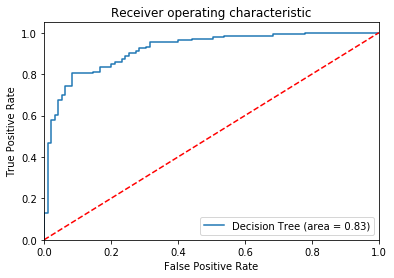

40.421014070510864


In [16]:
def XGBoost():
    start=time.time()
    from xgboost import XGBClassifier
# fit model no training data
    model = XGBClassifier(random_state=24)
    model.fit(rX_train, y_train)
    y_pred = model.predict(rX_test)
    from sklearn.metrics import accuracy_score
    print('Accuracy Score of XGBoost is :', accuracy_score(y_test,y_pred)*100)
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(y_test,y_pred))
    # Import GridSearchCV
    from sklearn.model_selection import GridSearchCV
    estimator = XGBClassifier(objective= 'binary:logistic',nthread=4,seed=42)
    param_grid = {'max_depth': range (2, 10, 1),'n_estimators': range(60, 220, 40),'learning_rate': [0.1, 0.01, 0.05]}

    grid_model = GridSearchCV(estimator=estimator,param_grid=param_grid,scoring = 'roc_auc',n_jobs = 10,cv = 5,verbose=True)
# Use scaler to rescale X and assign it to rescaledX
    rescaledX = scaler.fit_transform(X)


# Fit data to grid_model
    grid_model_result = grid_model.fit(rescaledX,y)

# Summarize results
    best_score, best_params = grid_model_result.best_score_,grid_model_result.best_params_
    print("Best Accuracy of XGBoost is : %f using %s" % ((best_score*100),best_params))
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(y_test, model.predict(rX_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(rX_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    end=time.time()
    return end-start
X=XGBoost()
print(X)